### Day 1 - Generating and Testing Random Numbers

To do:
- [] Exercise 1
    - [] Using built-in functions
    - [] $\chi^2$ by hand
    - [] KS by hand
- [] Exercise 2

#### Exercise 1


--------
- Implementation of Linear Congruential Generator (LCG) (only integer representation)

**a) Generating 10,000 random numbers and presenting in a histogram**

In [24]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import copy
import scipy.stats as stat
import numpy as np

In [2]:
# Implementation of LCG as a generator
def LCG(M, a, c, seed, size):
    for i in range(size):
        seed = (a*seed+c)%M
        yield seed


# Determining parameters - ensure maximum cycle length

M = 127
a = 17
c = 1
seed = 46

num_lst = list(LCG(M, a, c, seed, 10000))

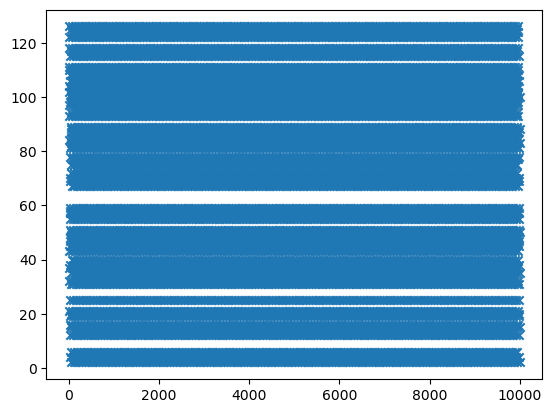

In [3]:
plt.scatter([i for i in range(10000)], num_lst, marker="x")
plt.show()

In [4]:
# Setting number of classes
num_classes = 10
# checking range of random numbers
print(f"Minimum random number: {min(num_lst)}")
print(f"Maximum random number: {max(num_lst)}")


Minimum random number: 2
Maximum random number: 126


Range of values: $\Delta x = 126 - 2 = 124$

$\therefore$ class sizes will be $\lfloor\frac{124}{10}\rfloor = 12$

numbers will be partitioned via the following: $[2+(j-1) \cdot 12, \ 2+j \cdot 12[$

**(not used)**

In [5]:
bins = {i: 0 for i in range(1, 11)}
cpy_num_lst = copy.copy(num_lst)

for j in range(1, num_classes+1):
    low = 2+(j-1)*12
    high = (2+j*12)-1
    for num in cpy_num_lst:
        if num >= low and num < high:
            bins[j]+=1

Creating histogram

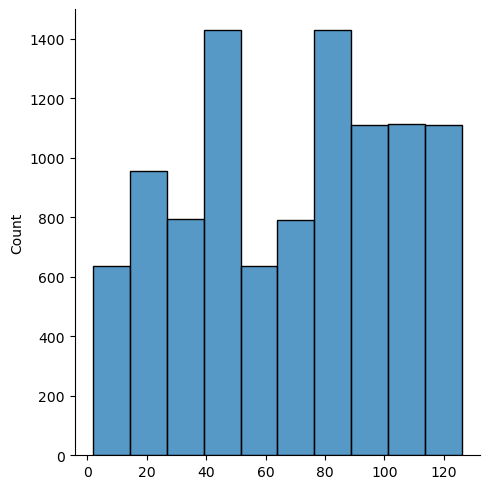

In [6]:
import seaborn as sns
sns.displot(num_lst, bins=10)

**b)  Evaluate the quality of the generator by graphical descriptive statistics (histograms, scatter plots) and statistical tests - $\chi^2$,Kolmogorov-Smirnov, run-tests, and correlation test.**

Graphical descriptive statistics:
- LCG clearly does not generate truly random numbers. Clearly show in scatter plot; large *bands* of values present where cycle repeats.
    - Also shown in histogram. Counts for each *bin* are not uniformly distributed, but appear to exhibit a slight positive skew (will be shown by linear regression).
#### Evaluating Distribution
- 1: $\chi^2$ test
- 2: Kolmogorov-Smirnov test

Proceeding with $\chi^2$ test:

$H_0$: Equal proportions $p_1 = p_2 = ... = p_{10} $

$H_1$: Proportions not equal $p_1 \neq p_2 \neq .. \neq p_{10}$

$\alpha = 0.05$

In [7]:
n_expected = 1000

test_stat = 0

for _, count in zip(bins.keys(), bins.values()):
    test_stat += ((count-n_expected)**2)/(n_expected)

print(f"Calculated test statistic: {test_stat}")

chi_stat, p_val = stat.chisquare(list(bins.values()))
print(f"Chi-squared critical value: {chi_stat}\nP-value: {p_val}")


Calculated test statistic: 767.4570000000001
Chi-squared critical value: 657.6742097282166
P-value: 8.63538015991093e-136


At a significance level of 5%, the null hypothesis is clearly rejected. Proportions of categories are not equal.

Now proceeding with the Kolmogorov Smirnov test:
- $H_0$: Distribution is uniform
- $H_1$: Distribution is not uniform

[  2.   14.4  26.8  39.2  51.6  64.   76.4  88.8 101.2 113.6 126. ] [0.     0.0635 0.0954 0.0795 0.1428 0.0636 0.0792 0.1428 0.111  0.1112
 0.111 ]


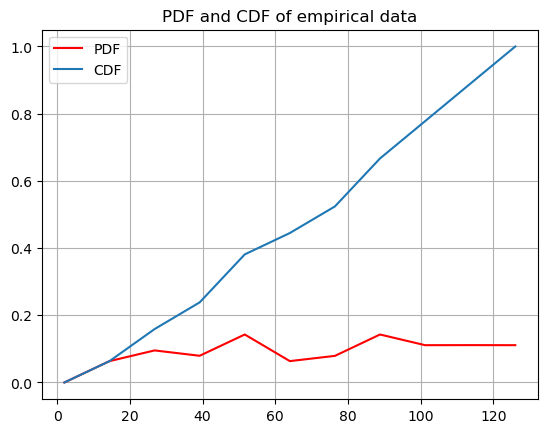

In [18]:
# Creating probability density function of empirical data

count, bins_count = np.histogram(num_lst, bins=10)

pdf = count/sum(count)
pdf = np.insert(pdf, 0, 0)
cdf  = np.cumsum(pdf)

# Plotting pdf and cdf
print(bins_count, pdf)

plt.plot(bins_count, pdf, color="red", label="PDF")
plt.plot(bins_count, cdf, label="CDF")
plt.title("PDF and CDF of empirical data")
plt.grid()
plt.legend()
plt.show()

In [29]:
# Getting empirical distribution

ecdf = ECDF(num_lst)
ecdf_vals = [ecdf(x) for x in bins_count]

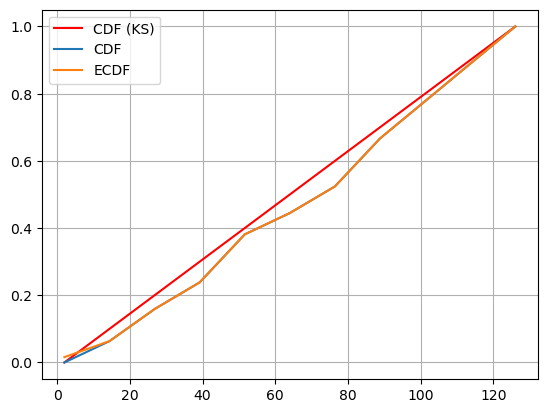

In [30]:
# cdf for KS test - uniform distribution

cdf_KS = [(x-2)/(126-2) for x in bins_count]
plt.plot(bins_count, cdf_KS, color ="red", label="CDF (KS)")
plt.plot(bins_count, cdf, label="CDF")
plt.plot(bins_count, ecdf_vals, label="ECDF")
plt.grid()
plt.legend()
plt.show()



In [31]:

adj_test_stat =  (np.sqrt(10) + 0.12 + (0.11/np.sqrt(10)))*np.max(np.abs(cdf-ecdf_vals))
print(f"Calculated test statistic: {adj_test_stat}")

Calculated test statistic: 0.05274129715944069


How to compare test statistics/reject or accept hypotheses?

In [23]:
x = stat.kstest(num_lst, cdf, N=10)
print(x)

KstestResult(statistic=1.0, pvalue=5.551115123125783e-16)


Reject null hypothesis.

#### Tests for Independence

1. Run tests
2. Correlation tests

David attempting run test

Patrick below:

In [12]:
#run test 1

import statistics

med = statistics.median(num_lst)
#calculate samples below and above the median
n1, n2 = 0, 0
for s in num_lst:
    if s > med:
        n1 += 1
    else:
        n2 += 1

#calculate mean and std for the normal distribution
m2, sd2 = (2 * (n1 * n2)/(n1 + n2) + 1, 2 * (n1 * n2 * (2*n1*n2-n1-n2) )/((n1 + n2)**2 * (n1+n2-1)) )

N = stat.norm(m2, sd2)
norm_random = N.rvs(10000)

#calculate test statistic
t = 0
for s in norm_random:
    if s > med or s < med:
        t += 1

print(t)

10000


In [13]:
#run test 2

#record increasing sequences in a list
latest_seq = 1
seq_lst = []
for i in range(1, 10000):
    if num_lst[i] >= num_lst[i-1]:
        latest_seq += 1
    else:
        seq_lst.append(latest_seq)
        latest_seq = 1

R = [0 in range(6)]
#save sequences until >=6
for i in range(len(latest_seq)):
    if latest_seq[i] >= 6:
        R[5] += 1
    else:
        R[latest_seq[i] - 1] += 1



TypeError: object of type 'int' has no len()

Visual tests for correlation:

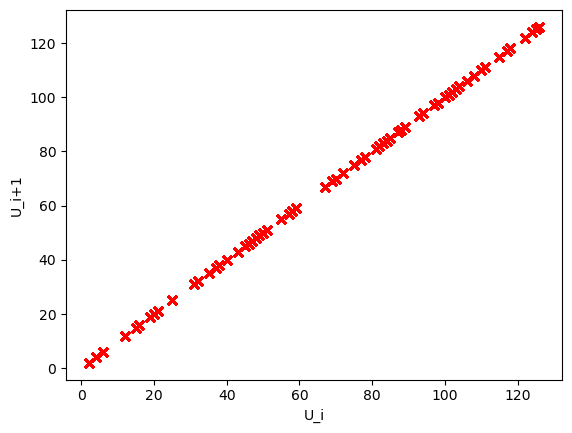

In [39]:

data = [(num_lst[i], num_lst[i+1]) for i in range(0, len(num_lst)-1)]
data_x = list(filter(lambda i: i[0], data))
data_y= list(filter(lambda i: i[1], data))

plt.scatter(data_x, data_y, marker="x", color="r")
plt.xlabel("U_i")
plt.ylabel("U_i+1")
plt.show()




Values should be uniformly distributed over the square $2 \rightarrow 126 \times 2 \rightarrow 126$.

Obvious that values are not IID.